# Most (ang. Bridge)

**Typ**: strukturalny \
**Zakres**: obiektowy \
**Inne nazwy**: uchwyt (ang. handle), ciało (ang. body)

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>most</b> oddziela abstrakcję od implementacji, tak aby obie mogły się zmieniać niezależnie.
</div>

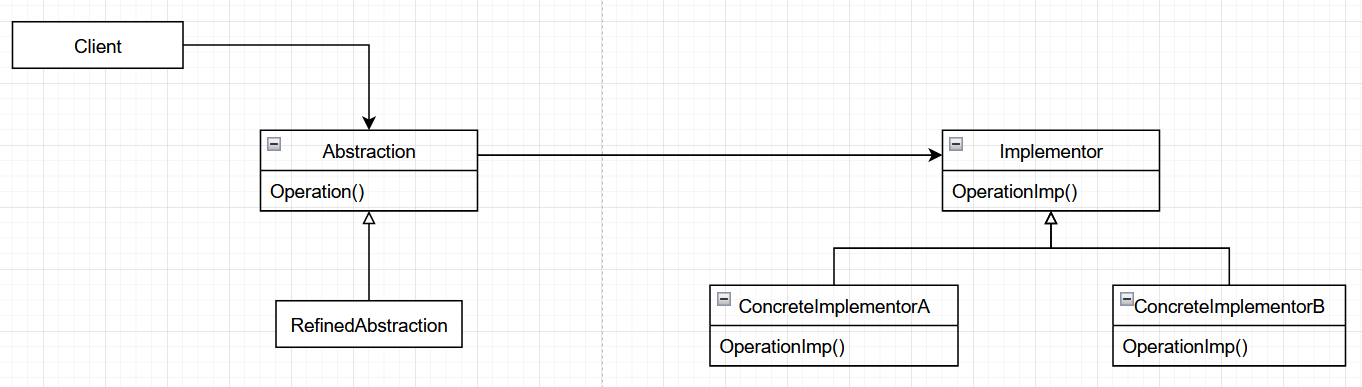

Ideą mostu jest **separacja dwóch hierarchii klas** Jedną hierarchię nazywamy **abstrackją**, a drugą **implementacją**.

**Uwaga!** Terminy abstrakcja i implementacja są tutaj przeciążone i wcale nie muszą oznaczać tego co oznaczają w programowaniu obiektowym. W kontekście tego wzorca Gang of Four używa tych terminów w znaczeniu:
- Abstrakcja = górna warstwa (z perspektywy klienta)
- Implementacja = dolna warstwa (szczegóły)

"Implementacja" we wzorcu Most NIE oznacza konkretnej klasy! To nazwa dla dolnej hierarchii, która też może być abstrakcyjna!

### Problem - eksplozja klas

Wyobraź sobie, że tworzysz system do obsługi pilotów do różnych urządzeń. Masz:
- **Typy pilotów**: BasicRemote, AdvancedRemote
- **Typy urządzeń**: TV, Radio

Jak to zaprojektować?

### Naiwne podejście - jeden typ dla każdej kombinacji

In [ ]:
# Hierarchia konkretnych urządzeń
class TV:
    def turn_on_off(self):
        print("TV: włączam/wyłączam")

    def set_volume(self, level):
        print(f"TV: głośność = {level}")


class Radio:
    def turn_on_off(self):
        print("Radio: włączam/wyłączam")

    def set_volume(self, level):
        print(f"Radio: głośność = {level}")


In [ ]:
# Hierarchia konkretnych pilotów

# PROBLEM: Eksplozja kombinacji klas (Cartesian Product Problem)
# Dla każdej kombinacji pilota i urządzenia potrzebujemy osobnej klasy!


# Eksplozja kombinacji - każdy pilot dla każdego urządzenia!
class BasicRemoteTV:
    def __init__(self):
        self.device = TV()  # silne sprzężenie z konkretną klasą!

    def power(self):
        self.device.turn_on_off()

    def volume_up(self):
        self.device.set_volume(10)


class BasicRemoteRadio:
    def __init__(self):
        self.device = Radio()  # silne sprzężenie z konkretną klasą!

    def power(self):
        self.device.turn_on_off()

    def volume_up(self):
        self.device.set_volume(10)


class AdvancedRemoteTV:
    def __init__(self):
        self.device = TV()  # silne sprzężenie z konkretną klasą!

    def power(self):
        self.device.turn_on_off()

    def volume_up(self):
        self.device.set_volume(10)

    def mute(self):
        self.device.set_volume(0)


class AdvancedRemoteRadio:
    def __init__(self):
        self.device = Radio()  # silne sprzężenie z konkretną klasą!

    def power(self):
        self.device.turn_on_off()

    def volume_up(self):
        self.device.set_volume(10)

    def mute(self):
        self.device.set_volume(0)

In [ ]:
# Użycie
remote = BasicRemoteTV()
remote.power()
remote.volume_up()

**Problemy:**

- **2 typy pilotów × 2 urządzenia = 4 klasy**
- Dodaj trzecie urządzenie (Projector) → **6 klas**
- Dodaj trzeci typ pilota (Smart) → **9 klas!**
- **Eksplozja kombinacji**
- Duplikacja kodu w każdej klasie
- Ciężko utrzymać i rozwijać

### Rozwiązanie - wzorzec Most

**Idea:** Zamiast jednej hierarchii z kombinacjami, stwórz **dwie niezależne hierarchie**:
1. **Abstrakcja** - piloty (Remote)
2. **Implementacja** - urządzenia (Device)

Połącz je **"mostem"** - pilot zawiera referencję do urządzenia.

### Krok 1: Hierarchia implementacji (Device)

In [ ]:
from abc import ABC, abstractmethod

# Interfejs implementacji
class Device(ABC):
    @abstractmethod
    def turn_on(self):
        pass
    
    @abstractmethod
    def turn_off(self):
        pass
    
    @abstractmethod
    def set_volume(self, volume: int):
        pass


# Konkretna implementacja - TV
class TV(Device):
    def __init__(self):
        self.volume = 50
        self.is_on = False
    
    def turn_on(self):
        self.is_on = True
        print("TV: włączony")
    
    def turn_off(self):
        self.is_on = False
        print("TV: wyłączony")
    
    def set_volume(self, volume: int):
        self.volume = volume
        print(f"TV: głośność = {self.volume}")


# Konkretna implementacja - Radio
class Radio(Device):
    def __init__(self):
        self.volume = 30
        self.is_on = False
    
    def turn_on(self):
        self.is_on = True
        print("Radio: włączone")
    
    def turn_off(self):
        self.is_on = False
        print("Radio: wyłączone")
    
    def set_volume(self, volume: int):
        self.volume = volume
        print(f"Radio: głośność = {self.volume}")

### Krok 2: Hierarchia abstrakcji (Remote)

In [ ]:
# Abstrakcja - zawiera referencję do implementacji (MOST!)
class Remote:
    def __init__(self, device: Device):
        self.device = device  # ← MOST między abstrakcją a implementacją
    
    def toggle_power(self):
        if self.device.is_on:
            self.device.turn_off()
        else:
            self.device.turn_on()
    
    def volume_up(self):
        self.device.set_volume(self.device.volume + 10)
    
    def volume_down(self):
        self.device.set_volume(self.device.volume - 10)


# Rozszerzona abstrakcja
class AdvancedRemote(Remote):
    def mute(self):
        print("Wyciszam...")
        self.device.set_volume(0)

### Krok 3: Użycie - wszystkie kombinacje bez nowych klas!

In [ ]:
# Podstawowy pilot + TV
print("=== Podstawowy pilot + TV ===")
tv = TV()
remote = Remote(tv)
remote.toggle_power()
remote.volume_up()

# Zaawansowany pilot + Radio
print("\n=== Zaawansowany pilot + Radio ===")
radio = Radio()
advanced_remote = AdvancedRemote(radio)
advanced_remote.toggle_power()
advanced_remote.volume_up()
advanced_remote.mute()

# Zaawansowany pilot + TV
print("\n=== Zaawansowany pilot + TV ===")
tv2 = TV()
advanced_remote2 = AdvancedRemote(tv2)
advanced_remote2.toggle_power()
advanced_remote2.mute()

**Zalety:**
- ✅ **2 piloty + 2 urządzenia = tylko 4 klasy** (nie 4 kombinacje!)
- ✅ **Dodanie nowego urządzenia** - tylko 1 klasa
- ✅ **Dodanie nowego pilota** - tylko 1 klasa
- ✅ **Wszystkie kombinacje działają** bez dodatkowego kodu
- ✅ **Brak duplikacji** - logika pilota raz, logika urządzenia raz

### Dodajemy nowe urządzenie - bez zmian w pilotach!

In [ ]:
# Nowe urządzenie - tylko 1 klasa!
class Projector(Device):
    def __init__(self):
        self.volume = 40
        self.is_on = False
    
    def turn_on(self):
        self.is_on = True
        print("Projektor: włączony")
    
    def turn_off(self):
        self.is_on = False
        print("Projektor: wyłączony")
    
    def set_volume(self, volume: int):
        self.volume = volume
        print(f"Projektor: głośność = {self.volume}")


In [ ]:
# Działa z każdym pilotem!
print("=== Podstawowy pilot + Projektor ===")
projector = Projector()
remote = Remote(projector)
remote.toggle_power()
remote.volume_up()

print("\n=== Zaawansowany pilot + Projektor ===")
projector2 = Projector()
advanced = AdvancedRemote(projector2)
advanced.toggle_power()
advanced.mute()

Dodaliśmy projektor (1 klasa) i automatycznie działa z obu pilotami!

## Struktura wzorca

**Elementy wzorca Most:**

1. **Abstraction** (Abstrakcja) - `Remote`
   - Interfejs wysokopoziomowy dla klienta
   - Zawiera referencję do Implementor (MOST!)
   - Deleguje operacje do Implementor

2. **RefinedAbstraction** (Rozszerzona abstrakcja) - `AdvancedRemote`
   - Rozszerza Abstraction o dodatkowe funkcje

3. **Implementor** (Implementator) - `Device`
   - Interfejs niskopoziomowy
   - Definiuje operacje implementacyjne

4. **ConcreteImplementor** - `TV`, `Radio`, `Projector`
   - Konkretne implementacje operacji

**Kluczowe:** Abstrakcja **zawiera** Implementor (kompozycja), nie dziedziczy!

## Przykład 2 - Wysyłanie wiadomości

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Implementacja - jak wysłać wiadomość
# ════════════════════════════════════════════════════════════
class MessageSender(ABC):
    @abstractmethod
    def send(self, message: str):
        pass


class EmailSender(MessageSender):
    def send(self, message: str):
        print(f"📧 Email: {message}")


class SMSSender(MessageSender):
    def send(self, message: str):
        print(f"📱 SMS: {message}")


class PushNotificationSender(MessageSender):
    def send(self, message: str):
        print(f"🔔 Push: {message}")


# ════════════════════════════════════════════════════════════
# Abstrakcja - co wysłać
# ════════════════════════════════════════════════════════════
class Message:
    def __init__(self, sender: MessageSender):
        self.sender = sender  # MOST!
    
    def send(self):
        pass  # Implementowane w podklasach


class TextMessage(Message):
    def __init__(self, sender: MessageSender, text: str):
        super().__init__(sender)
        self.text = text
    
    def send(self):
        self.sender.send(self.text)


class UrgentMessage(Message):
    def __init__(self, sender: MessageSender, text: str):
        super().__init__(sender)
        self.text = text
    
    def send(self):
        self.sender.send(f"⚠️ PILNE: {self.text}")


# ════════════════════════════════════════════════════════════
# Użycie - wszystkie kombinacje!
# ════════════════════════════════════════════════════════════

# Zwykła wiadomość przez email
msg1 = TextMessage(EmailSender(), "Spotkanie o 15:00")
msg1.send()

# Pilna wiadomość przez SMS
msg2 = UrgentMessage(SMSSender(), "Serwer nie działa!")
msg2.send()

# Zwykła wiadomość przez push
msg3 = TextMessage(PushNotificationSender(), "Nowa wiadomość")
msg3.send()

# Pilna wiadomość przez email
msg4 = UrgentMessage(EmailSender(), "Krytyczny błąd")
msg4.send()

**2 typy wiadomości × 3 sposoby wysyłki = 6 kombinacji bez dodatkowych klas!**

## Most vs Adapter - kluczowa różnica

Oba wzorce używają kompozycji, ale mają **różne cele**:

| Cecha | Most (Bridge) | Adapter |
|-------|---------------|----------|
| **Cel** | Oddzielić abstrakcję od implementacji | Dopasować niekompatybilne interfejsy |
| **Kiedy** | **Planowane z góry** (design) | **Post factum** (integracja) |
| **Hierarchie** | Dwie niezależne hierarchie | Jedna klasa adaptuje drugą |
| **Intencja** | Elastyczność - obie strony mogą się zmieniać | Kompatybilność - dopasowanie interfejsów |
| **Przykład** | Pilot + Urządzenie (planowane razem) | PayPal → PaymentProcessor (retrofit) |

**Most:** "Od początku projektujemy dwie niezależne hierarchie" \
**Adapter:** "Mamy istniejący kod, który nie pasuje - musimy go dopasować"

## Wizualizacja różnicy

In [ ]:
# ════════════════════════════════════════════════════════════
# MOST - projektujemy z góry
# ════════════════════════════════════════════════════════════
class Abstraction:
    def __init__(self, implementation):
        self.implementation = implementation  # Planowane połączenie
    
    def operation(self):
        self.implementation.impl_operation()  # Delegacja

# Obie strony projektowane razem - interfejs pasuje


# ════════════════════════════════════════════════════════════
# ADAPTER - naprawiamy po fakcie
# ════════════════════════════════════════════════════════════
class Target:
    def request(self):
        pass

class Adaptee:
    def specific_request(self):  # Inny interfejs!
        pass

class Adapter(Target):
    def __init__(self, adaptee):
        self.adaptee = adaptee
    
    def request(self):
        # Tłumaczenie - interfejsy nie pasują
        self.adaptee.specific_request()

## Kiedy używać wzorca Most?

Wzorzec Most stosuj gdy:

1. **Chcesz uniknąć trwałego powiązania abstrakcji z implementacją**
   - Implementacja może być wybierana lub zmieniana w runtime

2. **Abstrakcja i implementacja powinny być rozszerzalne przez podklasy**
   - Chcesz łączyć różne abstrakcje z różnymi implementacjami

3. **Masz eksplozję klas przez kombinacje**
   - n abstrakcji × m implementacji = n+m klas (nie n×m!)

**Przykłady praktyczne:**
- Różne UI (abstrakcja) + różne platformy (implementacja)
- Różne formaty dokumentów + różne renderery
- Różne typy wiadomości + różne kanały wysyłki
- Różne warstwy perzystencji + różne bazy danych

## Podsumowanie

Wzorzec Most:
- ✅ **Oddziela** abstrakcję od implementacji
- ✅ **Zapobiega** eksplozji klas (n+m zamiast n×m)
- ✅ **Umożliwia** niezależne rozszerzanie obu hierarchii
- ✅ **Ukrywa** szczegóły implementacji przed klientem
- ✅ **Zwiększa** elastyczność - można zmieniać implementację w runtime

**Kluczowa idea:**
> "Prefer composition over inheritance" - zamiast dziedziczenia użyj kompozycji

**Struktura:**
- **Abstraction** - interfejs wysokopoziomowy, zawiera Implementor
- **Implementor** - interfejs niskopoziomowy
- **MOST** = kompozycja łącząca obie strony

**Różnica od Adaptera:**
- **Most** - planowane z góry, dwie równorzędne hierarchie
- **Adapter** - post factum, dopasowanie niekompatybilnych interfejsów

**Formuła:**
- Bez Mostu: `n abstrakcji × m implementacji = n×m klas`
- Z Mostem: `n abstrakcji + m implementacji = n+m klas`